In [60]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.svm import SVC
#from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix






In [2]:
df=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\Python Scripts\hr.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
771,54,No,Travel_Rarely,1082,Sales,2,4,Life Sciences,1,1070,...,2,80,1,13,4,3,9,4,7,0
1070,28,No,Travel_Frequently,467,Sales,7,3,Life Sciences,1,1507,...,4,80,0,5,5,3,4,2,1,3
740,35,No,Travel_Rarely,802,Research & Development,10,3,Other,1,1028,...,1,80,1,3,4,2,3,2,1,2
1027,34,No,Travel_Rarely,401,Research & Development,1,3,Life Sciences,1,1447,...,1,80,1,7,2,2,5,4,0,2
851,56,No,Travel_Rarely,718,Research & Development,4,4,Technical Degree,1,1191,...,4,80,1,28,2,3,5,2,4,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

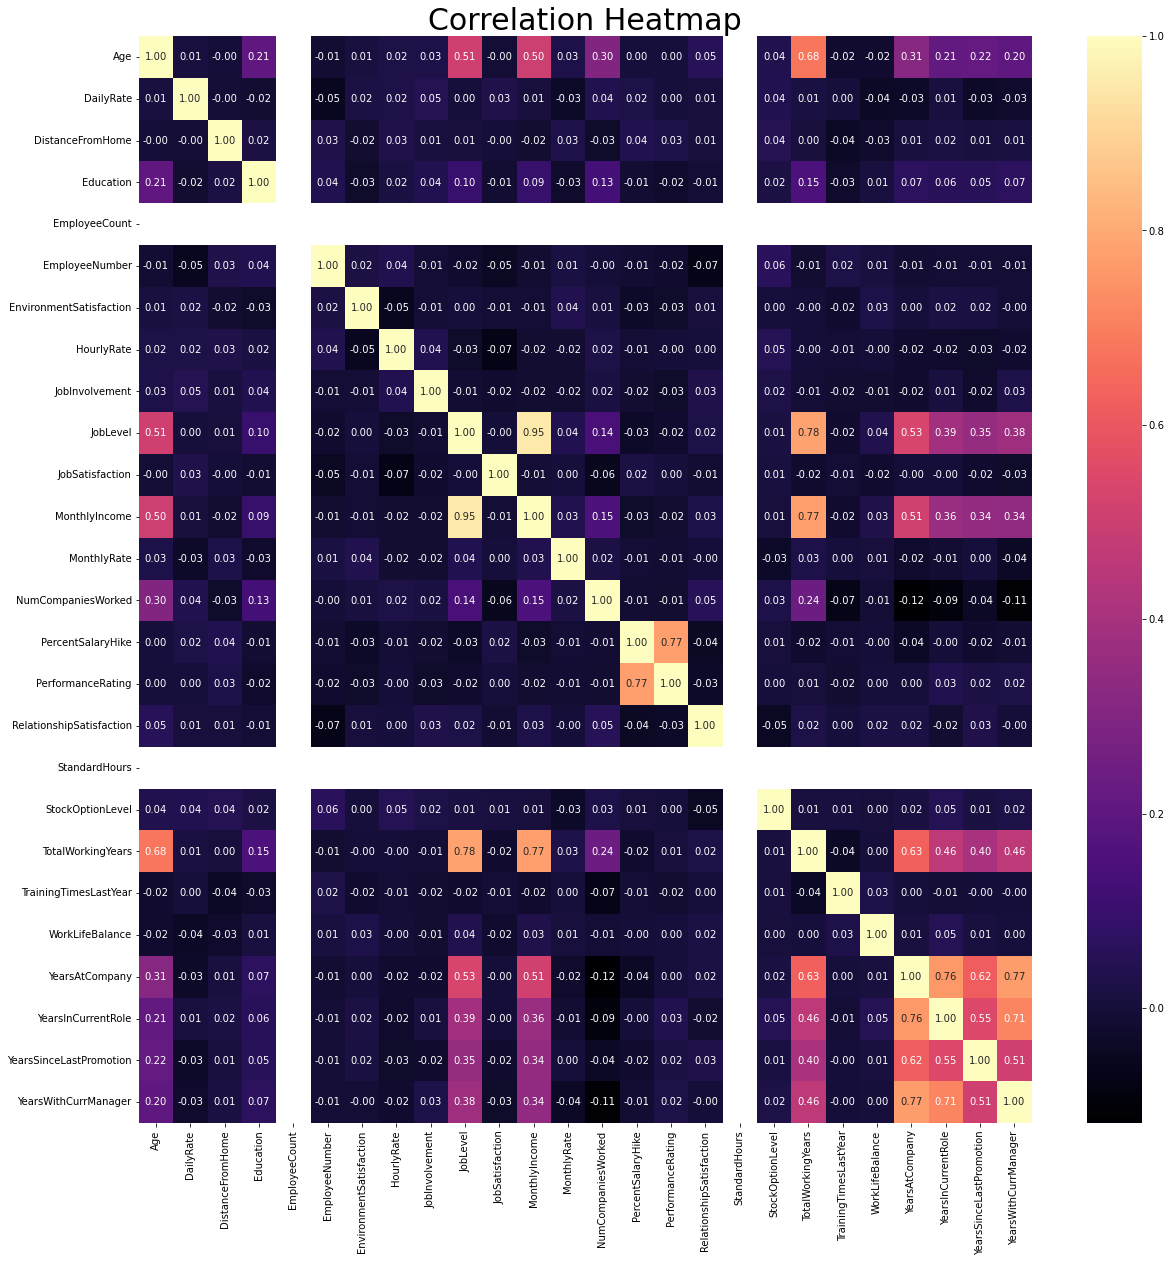

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

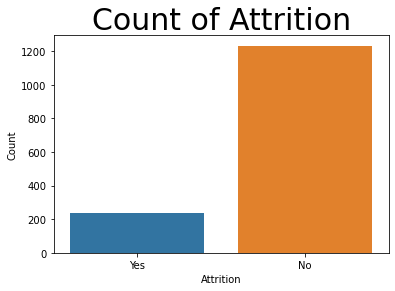

In [10]:
sns.countplot('Attrition', data=df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# identify categorical and numerical variable

In [11]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
450,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,Yes
1052,No,Non-Travel,Research & Development,Technical Degree,Male,Research Scientist,Divorced,Y,No
480,Yes,Travel_Frequently,Sales,Life Sciences,Male,Sales Representative,Married,Y,No
818,No,Travel_Frequently,Sales,Life Sciences,Male,Sales Representative,Married,Y,No
121,No,Non-Travel,Sales,Marketing,Male,Sales Executive,Married,Y,No


In [12]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1084,34,971,1,3,1,1535,4,64,2,3,...,4,80,0,10,3,3,10,9,8,6
597,42,932,1,2,1,827,4,43,2,2,...,4,80,1,8,4,3,4,3,0,2
1035,31,1398,8,2,1,1461,4,96,4,1,...,4,80,0,8,3,3,3,2,0,2
903,29,1329,7,3,1,1260,3,82,3,2,...,2,80,2,6,2,3,6,0,1,0
1384,34,937,1,3,1,1950,1,32,3,3,...,1,80,0,14,3,2,14,8,2,1


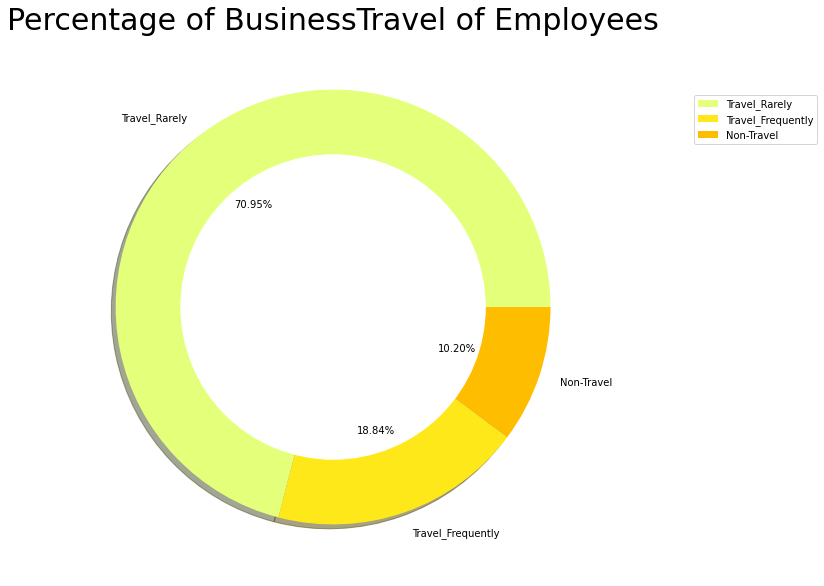

In [13]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

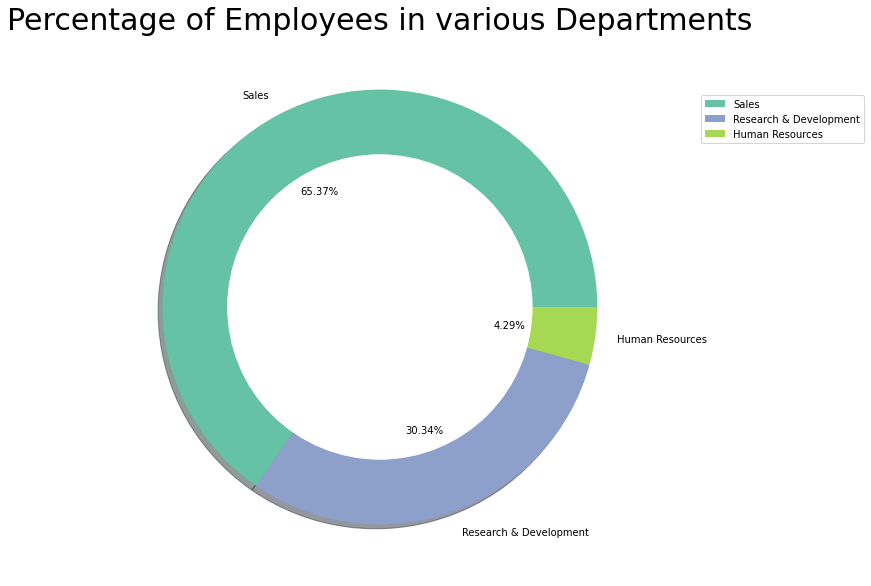

In [14]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

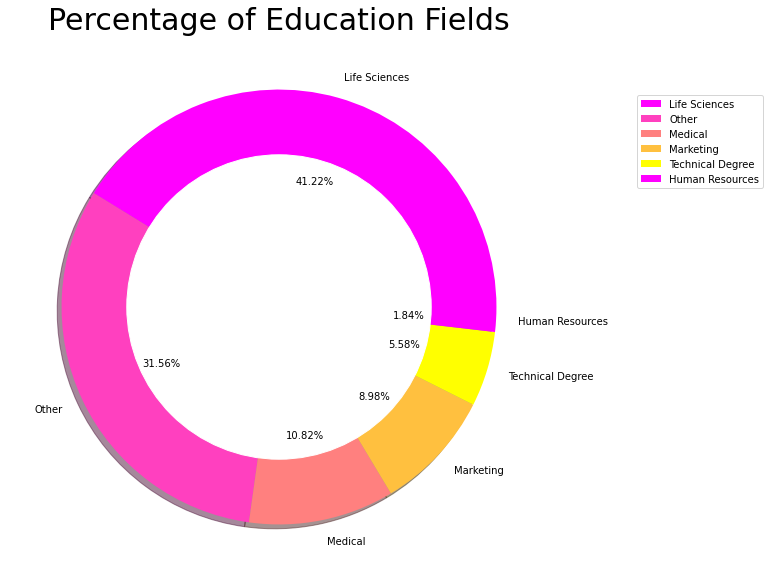

In [15]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

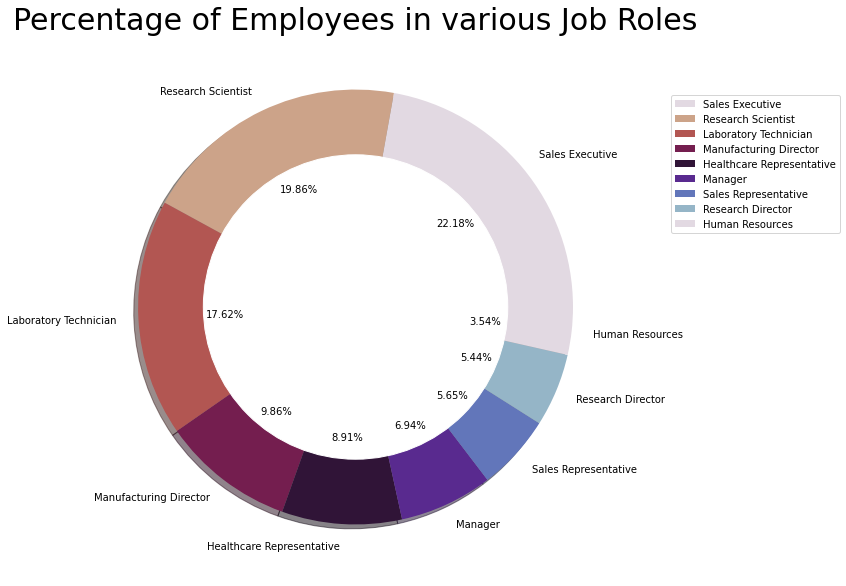

In [16]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

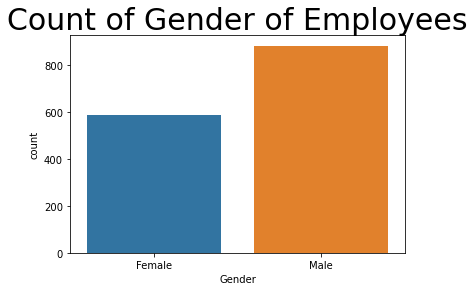

In [17]:
sns.countplot('Gender', data=df)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

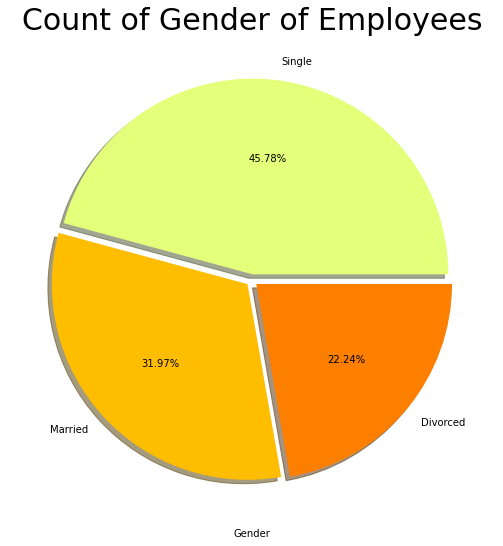

In [18]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

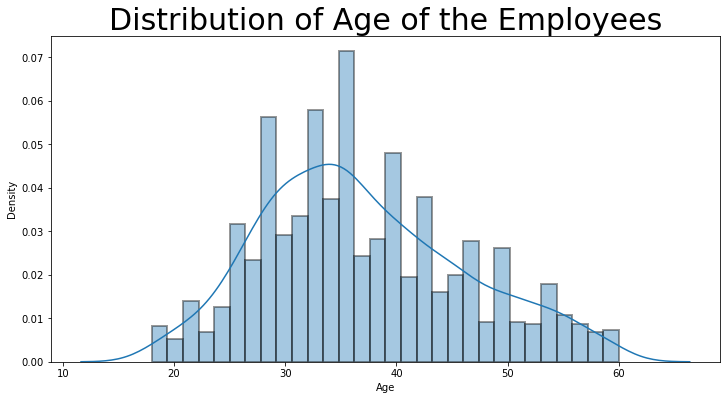

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

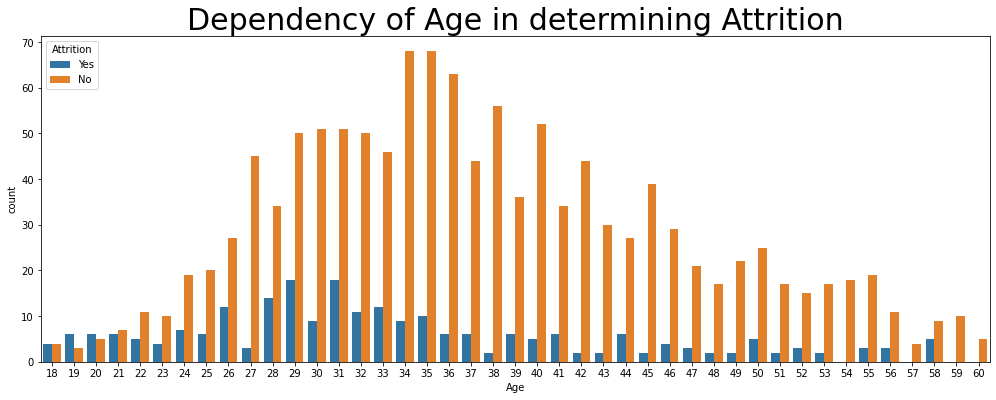

In [20]:
plt.figure(figsize=(17,6))
sns.countplot('Age', hue='Attrition', data=df)
plt.title('Dependency of Age in determining Attrition', fontsize=30)
plt.xlabel('Age')
plt.show()

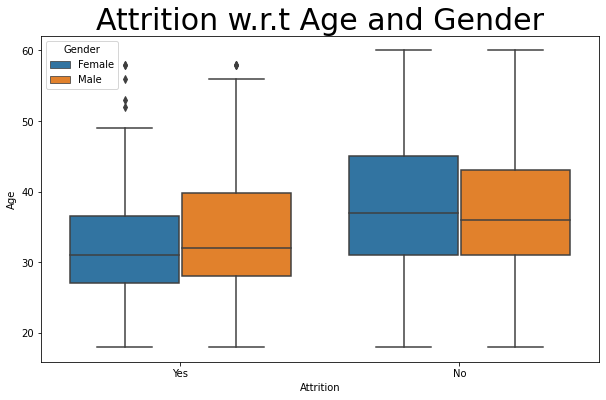

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=df)
plt.title('Attrition w.r.t Age and Gender', fontsize=30)
plt.xlabel('Attrition')
plt.show()

<Figure size 1368x432 with 0 Axes>

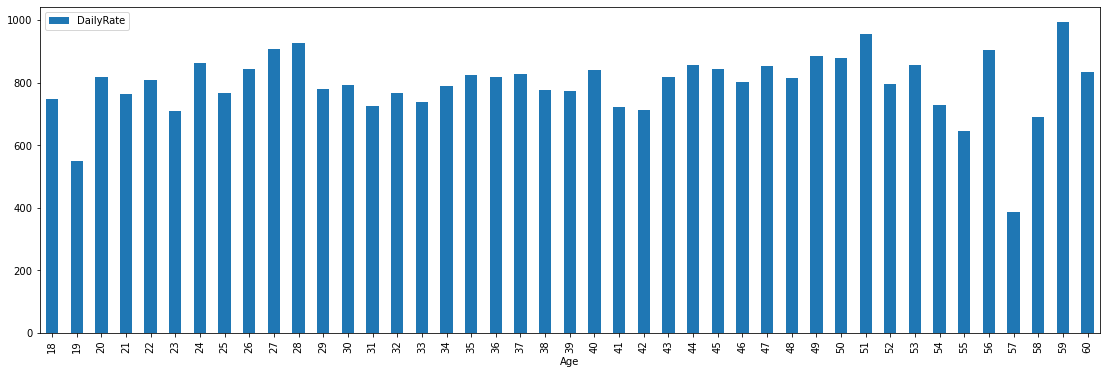

In [22]:
plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

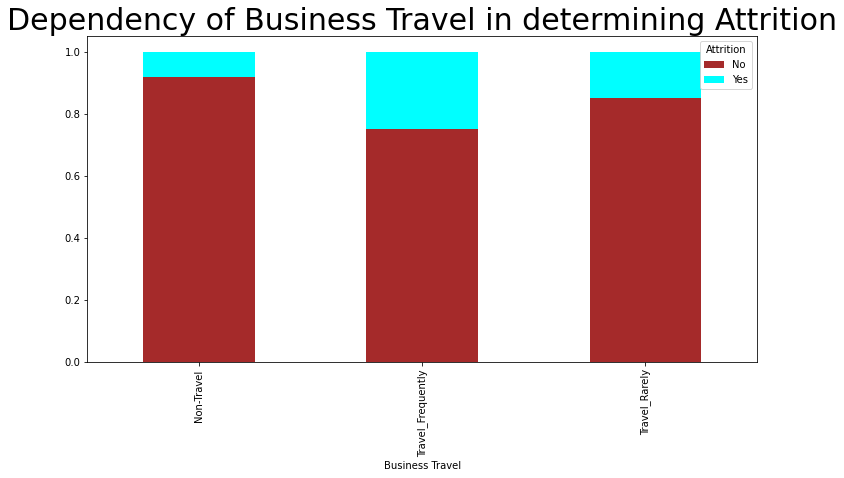

In [23]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

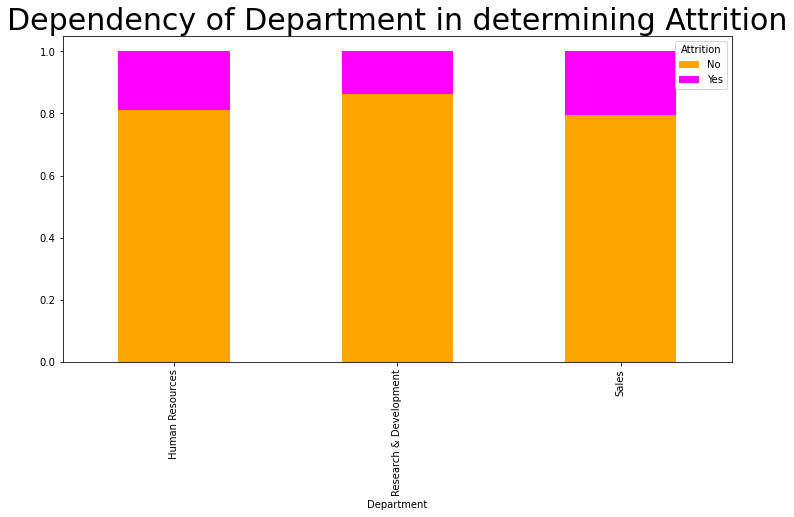

In [24]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

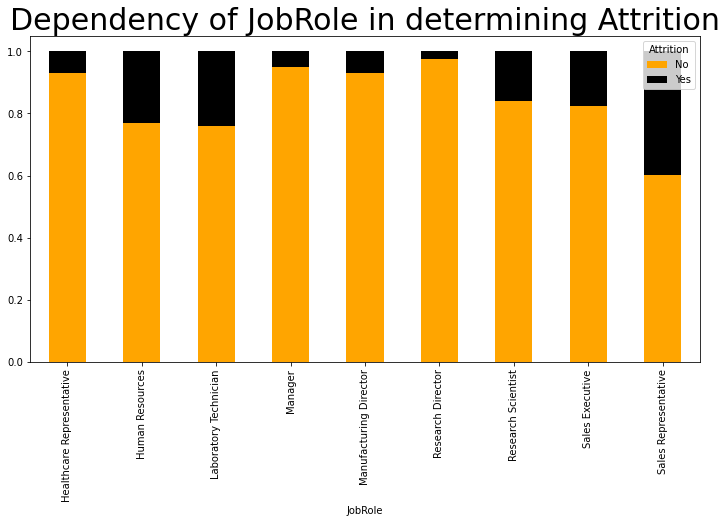

In [25]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

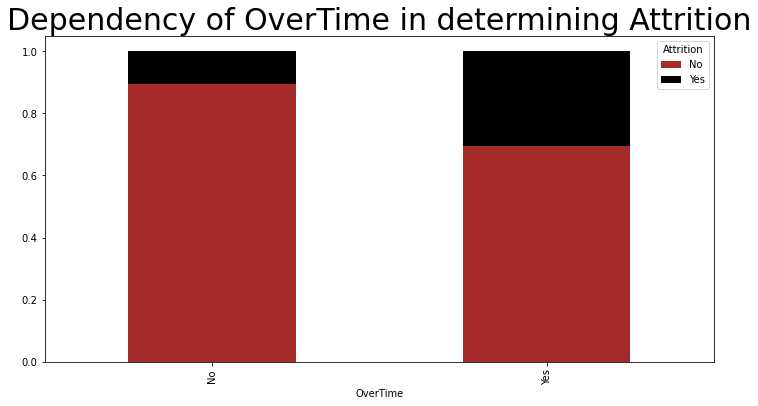

In [26]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

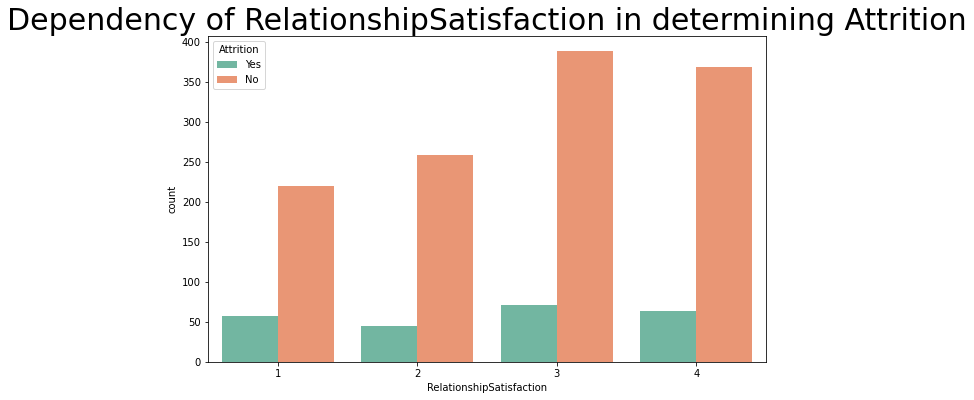

In [27]:
plt.figure(figsize=(10,6))
sns.countplot('RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

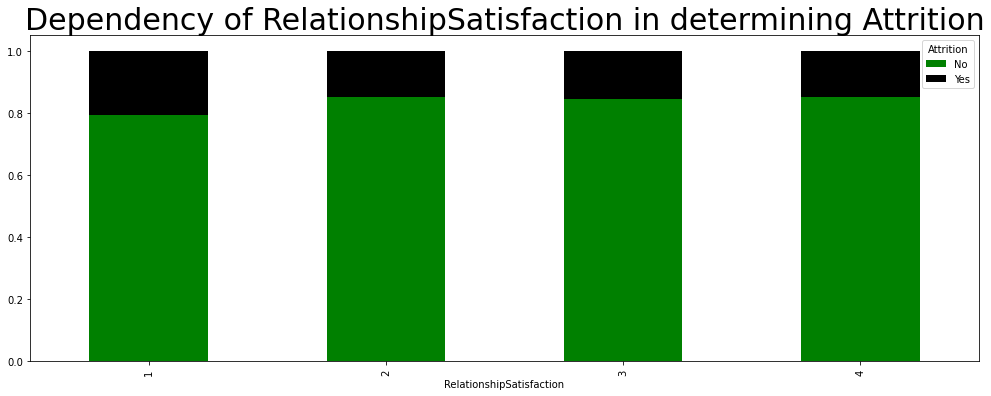

In [28]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

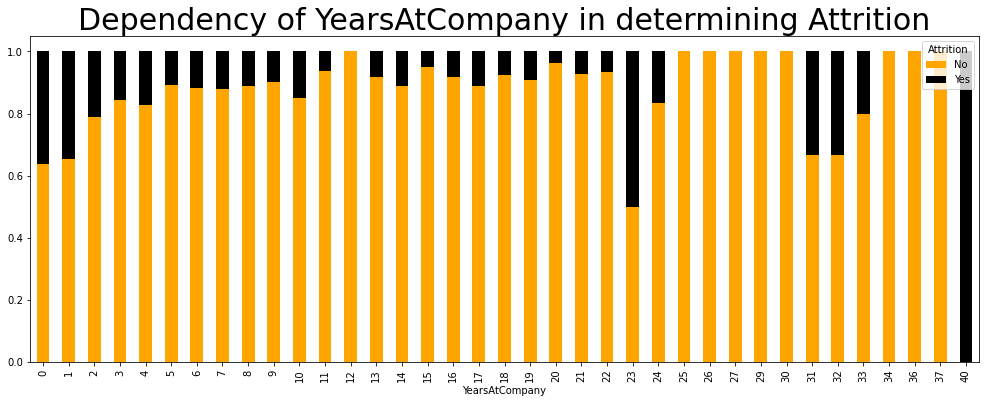

In [29]:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

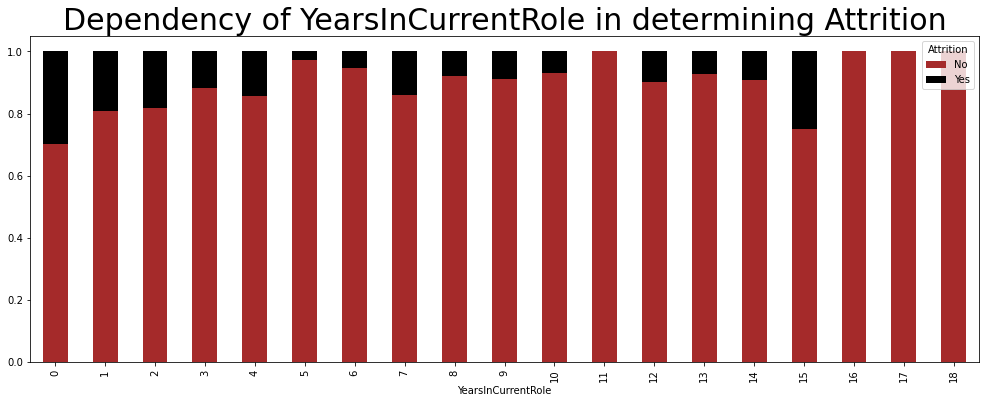

In [30]:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

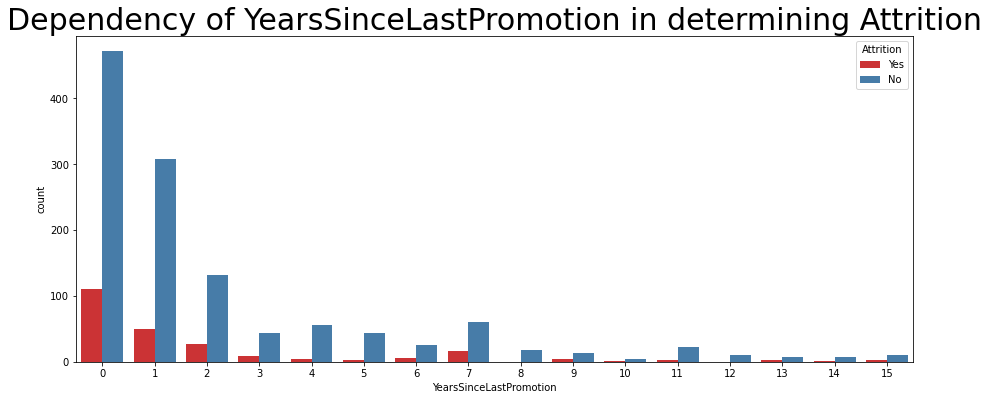

In [31]:
plt.figure(figsize=(15,6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

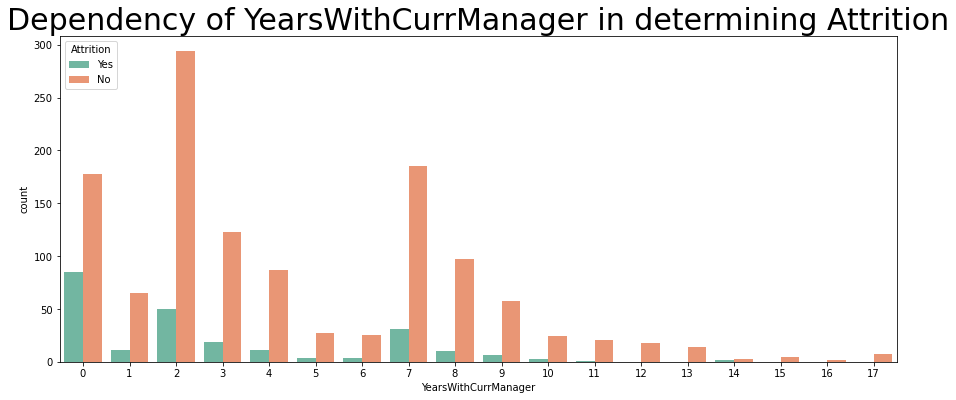

In [32]:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

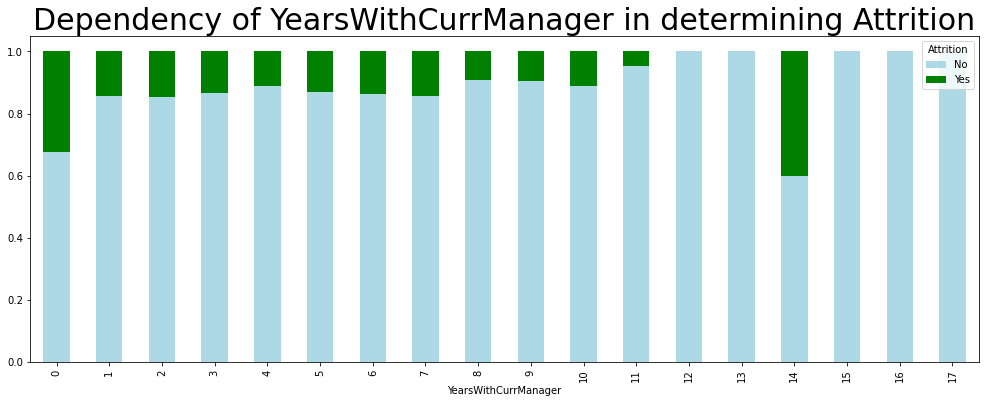

In [33]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()


In [34]:
df = df.drop('EmployeeCount', axis=1) # removing EmployeeCount from numerical columns
df = df.drop('StandardHours', axis=1)

In [35]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
959,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,Y,No
396,No,Travel_Rarely,Research & Development,Other,Female,Healthcare Representative,Divorced,Y,Yes
847,No,Travel_Frequently,Research & Development,Medical,Male,Healthcare Representative,Single,Y,No
938,No,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,No
1192,No,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Divorced,Y,Yes


In [36]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

df = pd.get_dummies(df, columns=cols, drop_first=True)

In [37]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    X_train[col] = scaler.fit_transform(X_train[col].values.reshape(-1 ,1))
    X_test[col] = scaler.fit_transform(X_test[col].values.reshape(-1 ,1))

The optimal number of neighbors is  7 


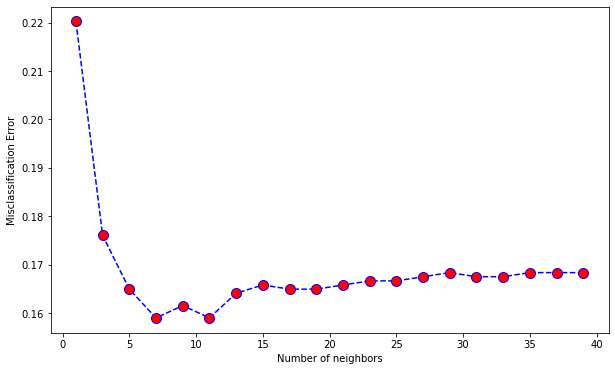

In [39]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

In [40]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.86      1.00      0.92       978
         Yes       0.90      0.18      0.30       198

    accuracy                           0.86      1176
   macro avg       0.88      0.59      0.61      1176
weighted avg       0.86      0.86      0.82      1176


Confusion Matrix: 
 [[974   4]
 [163  35]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0130
accuracy score: 0.8580

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      0.98      0.93       255
         Yes       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294


Confusion Matrix: 
 [[251   4]
 [ 35   4]]

accuracy score: 0.867

In [41]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
rfc = RandomForestClassifier(**rf_params) 
rfc.fit(X_train, y_train) 
print_score(rfc, X_train, y_train, X_test, y_test, train = True) 
print_score(rfc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       978
         Yes       1.00      0.14      0.24       198

    accuracy                           0.85      1176
   macro avg       0.93      0.57      0.58      1176
weighted avg       0.88      0.85      0.81      1176


Confusion Matrix: 
 [[978   0]
 [171  27]]

Average Accuracy: 	 0.8410
Accuracy SD: 		 0.0124
accuracy score: 0.8546

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.88      1.00      0.94       255
         Yes       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294


Confusion Matrix: 
 [[255   0]
 [ 35   4]]

accuracy score: 0.881

In [61]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}
gbc = GradientBoostingClassifier(**gb_params) 
gbc.fit(X_train, y_train) 
print_score(gbc, X_train, y_train, X_test, y_test, train = True) 
print_score(gbc, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       978
         Yes       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[978   0]
 [  0 198]]

Average Accuracy: 	 0.8597
Accuracy SD: 		 0.0167
accuracy score: 1.0000

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

          No       0.90      0.95      0.93       255
         Yes       0.52      0.33      0.41        39

    accuracy                           0.87       294
   macro avg       0.71      0.64      0.67       294
weighted avg       0.85      0.87      0.86       294


Confusion Matrix: 
 [[243  12]
 [ 26  13]]

accuracy score: 0.870

Text(0, 0.5, 'Features')

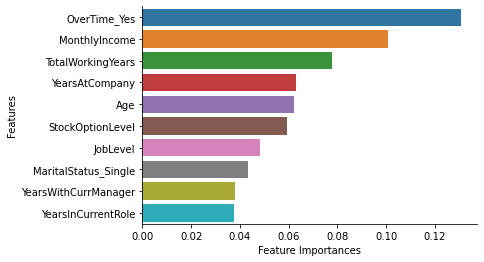

In [62]:
feature = rfc.feature_importances_
feature_importances = pd.Series(feature, index=X_train.columns).sort_values(ascending = False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")

HERE ALMOST EACH MODEL GIVES NEARBY ACCURACY SO OUT THESE RANDOMFORESTCLASSIFIERIS BEST ONE

In [ ]:
from sklearn.model_selection import GridSearchCV



param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

# save the model

In [ ]:
import pickle

model = RandomForestClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)